## Independencia Lineal

En \ref{OrtogonalizacionGram-Schmidt} vimos que si en la ecuación 

$$
\left|  {0}\right> =C_{1}\ \left|  v_{1}\right> +C_{2}\ \left|  v_{2}\right> +C_{3}\ \left|  v_{3}\right> \cdots+C_{n}\ \left|  v_{n}\,, \right>
$$

con todos los $C_{i}=0$,  entonces se dirá que el conjunto de vectores son linealmente independientes. 


Para el segundo ejemplo de esa sección (ejemplo \ref{EjemploOrtogonalizacion2}) se obtuvo el siguiente sistema de ecuaciones:

\begin{array}{rrrr}
C_1 & +2 C_2 & -C_3 & =0 \\
3 C_1 & & +C_3 & =0 \\
-C_1 & +C_2 & & =0 \\
2 C_1 & +3 C_2 & = & 0
\end{array}

Sistema que debemos resolver


In [1]:
import sympy
from sympy import *

In [2]:
C1,C2,C3 = symbols('C1 C2 C3 ')
linsolve([C1+2*C2-C3, 3*C1+C3, -C1+C2, 2*C1+3*C2], (C1, C2, C3))

{(0, 0, 0)}

##  Bases para espacios vectoriales

En este ejercicio aprenderemos a calcular una base a partir de un conjunto de vectores perteneciente a un determinado espacio vectorial. Por ejemplo, si en  $\mathbf{R}^5$ tenemos el siguiente conjunto de vectores:
$$
\left| v_{1}\right>=(1,2,3,4,5)\,, \,\, 
\left| v_{2}\right>=(0,-1,1,2,3)\,,\,\,  
\left| v_{3}\right>=(3,2,1,0,-1)\,, \,\,  
\left| v_{4}\right>=(-4,-3,-2,-1,0) \,.
$$


In [3]:
v1= Matrix([[1,2,3,4,5]]) 
v2= Matrix([[0,-1,1,2,3]]) 
v3= Matrix([[3,2,1,0,-1]])  
v4= Matrix([[-4,-3,-2,-1,0]])  

Con los vectores dados construimos la siguiente matriz

In [4]:
M=Matrix([[v1],[v2],[v3],[v4]]) 
M

Matrix([
[ 1,  2,  3,  4,  5],
[ 0, -1,  1,  2,  3],
[ 3,  2,  1,  0, -1],
[-4, -3, -2, -1,  0]])

Como veremos más adelante, el Rango de una matriz indica el número máximo de vectores fila o columna linealmente independientes. 

In [5]:
M.rank()

3

Podemos aplicar el método de eliminación gaussiana a la matriz ${\bf M}$ para obtener una nueva matriz escalonada. El cálculo además se hace normalizando el primer elemento no nulo de cada fila.

In [6]:
rref_M ,pivots= M.rref()
rref_M

Matrix([
[1, 0, 0, -1/3, -2/3],
[0, 1, 0, -1/3, -2/3],
[0, 0, 1,  5/3,  7/3],
[0, 0, 0,    0,    0]])

In [7]:
M.echelon_form()

Matrix([
[1,  2,  3,  4,  5],
[0, -1,  1,  2,  3],
[0,  0, 12, 20, 28],
[0,  0,  0,  0,  0]])

Por lo tanto, cada fila de la matriz anterior conformará un conjunto de vectores linealmente independiente. 

Para verificar que el conjunto: $\{\mathrm{e}1, \mathrm{e}2, \mathrm{e}3\}$ es linealmente independientes podemos hacer lo siguiente:

In [8]:
# Definir las variables
α, β, γ = symbols('α β γ')
#  Aislamos los vectores  de la matriz
e1 = rref_M[0, :]
e2 = rref_M[1, :]
e3 = rref_M[2, :]
# Construir el sistema de ecuaciones
sistema = [
    Eq(α*e1[0] + β*e2[0] + γ*e3[0], 0),
    Eq(α*e1[1] + β*e2[1] + γ*e3[1], 0),
    Eq(α*e1[2] + β*e2[2] + γ*e3[2], 0)
]
# Resolver el sistema de ecuaciones
solucion = solve(sistema, (α, β, γ))
# Verificar si los vectores son linealmente independientes
if solucion == {α: 0, β: 0, γ: 0}:
    print("Los vectores son linealmente independientes.")
else:
    print("Los vectores no son linealmente independientes.")

Los vectores son linealmente independientes.


Consideremos otros ejemplos, dados los vectores ${\bf a}=(1,3)$ y ${\bf b}=(-1,1)$ ¿Serán linealmente independientes?

Otra variante se muestra a continuación

In [9]:
# Definir las matrices que representan los vectores
a= Matrix([[1,3]]) 
b= Matrix([[-1,1]]) 
# Construir una matriz con los vectores como filas
matriz = Matrix.vstack(a, b)
# Calcular el rango de la matriz
rango = matriz.rank()
# Verificar si los vectores son linealmente independientes
if rango == len([a, b]):
    print("Los vectores son linealmente independientes.")
else:
    print("Los vectores no son linealmente independientes.")

Los vectores son linealmente independientes.


Los vectores ${\bf a}=(1,2,3)$ y ${\bf b}=(4,8,12)$ 

¿Serán linealmente independientes? 

Un código alternativo sería 

In [10]:
# Definir los vectores como coeficientes
a= Matrix([[1,2,3]]) 
b= Matrix([[4,8,12]]) 
# Construir el sistema de ecuaciones
sistema = [
    Eq(α*a[0] + β*b[0], 0),
    Eq(α*a[1] + β*b[1], 0)
]
# Resolver el sistema de ecuaciones
solucion = solve(sistema, (α, β, γ))
# Mostrar los valores de los coeficientes
print("Los valores de los coeficientes son:")
for coeficiente, valor in solucion.items():
    print(f"{coeficiente}: {valor}")

Los valores de los coeficientes son:
α: -4*β


Por lo tanto son linealmente dependientes

Sea ahora $\{{\bf e}_i\}=\{(1,1,1),(1,2,1),(0,0,2)\}$ una base para $\mathbf{R}^3$. 

Vamos a calcular  las componentes del vector ${\bf a}=(3, 2, 1)$ respecto de esa base.

Primero podemos verificar si efectivamente forman una base:

In [11]:
# Definir los vectores como coeficientes
e1= Matrix([[1,1,1]]) 
e2= Matrix([[1,2,1]]) 
e3= Matrix([[0,0,2]])
# Construir el sistema de ecuaciones
sistema = [
    Eq(α*e1[0] + β*e2[0] + γ*e3[0], 0),
    Eq(α*e1[1] + β*e2[1] + γ*e3[1], 0),
    Eq(α*e1[2] + β*e2[2] + γ*e3[2], 0)
]
# Resolver el sistema de ecuaciones
solucion = solve(sistema, (α, β, γ))
# Mostrar los valores de los coeficientes
print("Los valores de los coeficientes son:")
for coeficiente, valor in solucion.items():
    print(f"{coeficiente}: {valor}")

Los valores de los coeficientes son:
α: 0
β: 0
γ: 0


El código que se muestra a continuación es más efectivo 

In [12]:
# Definir los vectores de la base y el vector a
e1 = Matrix([1, 1, 1])
e2 = Matrix([1, 2, 1])
e3 = Matrix([0, 0, 2])
a =  Matrix([3, 2, 1])
# Formar el sistema de ecuaciones
sistema = [
    Eq(α*e1[0] + β*e2[0] + γ*e3[0], a[0]),
    Eq(α*e1[1] + β*e2[1] + γ*e3[1], a[1]),
    Eq(α*e1[2] + β*e2[2] + γ*e3[2], a[2])
]
# Resolver el sistema de ecuaciones
solucion = solve(sistema, (α, β, γ))
# Mostrar los coeficientes
print("Las componentes del vector a respecto de la base son:")
print("α =", solucion[α])
print("β =", solucion[β])
print("γ =", solucion[γ])

Las componentes del vector a respecto de la base son:
α = 4
β = -1
γ = -1


Por lo tanto, ${\bf a}=4{\bf e}_1-{\bf e}_2-{\bf e}_3$. 

Cómo será el vector ${\bf a}$  en la base canónica

In [13]:
# Definir los vectores de la base y el vector a
e1 = Matrix([1, 0, 0])
e2 = Matrix([0, 1, 0])
e3 = Matrix([0, 0, 1])
a =  Matrix([3, 2, 1])
# Formar el sistema de ecuaciones
sistema = [
    Eq(α*e1[0] + β*e2[0] + γ*e3[0], a[0]),
    Eq(α*e1[1] + β*e2[1] + γ*e3[1], a[1]),
    Eq(α*e1[2] + β*e2[2] + γ*e3[2], a[2])
]
# Resolver el sistema de ecuaciones
solucion = solve(sistema, (α, β, γ))
# Mostrar los coeficientes
print("Las componentes del vector a respecto de la base son:")
print("α =", solucion[α])
print("β =", solucion[β])
print("γ =", solucion[γ])

Las componentes del vector a respecto de la base son:
α = 3
β = 2
γ = 1


Es decir, ${\bf a}=3\hat{i}+2\hat{j}+\hat{k}$.

## Ortogonalización con Sympy

Anteriormente hicimos los cálculos para hallar una base ortogonal a partir del siguiente conjunto de vectores linealmente independientes:

$$
\left|v_1\right\rangle=\left(\begin{array}{r}
1 \\
3 \\
-1 \\
2
\end{array}\right) ; \quad\left|v_2\right\rangle=\left(\begin{array}{l}
2 \\
0 \\
1 \\
3
\end{array}\right) ; \quad\left|v_3\right\rangle=\left(\begin{array}{r}
-1 \\
1 \\
0 \\
0
\end{array}\right)
$$

Se puede proceder de la manera siguiente



Note que el vector $\left| v_{3}\right>$ es el que vamos puea poner  en la primera fila de la matriz. Ahora procedemos al cálculo:

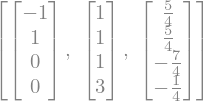

In [14]:
init_printing()
v1= Matrix([-1,1,0,0])
v2= Matrix([2,0,1,3])
v3= Matrix([1,3,-1,2])

L=(v1,v2,v3)
LGS=GramSchmidt(L)
LGS

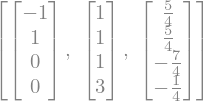

In [15]:
Matrix.orthogonalize(*L)

In [16]:
e1=LGS[0]
e2=LGS[1]
e3=LGS[2]

Podemos verificar que son ortogonales:

In [17]:
e1.dot(e2), e1.dot(e3),e2.dot(e3),

Estos vectores normalizados son:

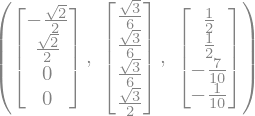

In [18]:
e1/(sqrt(e1.dot(e1))), e2/(sqrt(e2.dot(e2))), e3/(sqrt(e3.dot(e3)))

En SymPy no disponemos d euna función que permita  definir un producto interno diferente al producto interno usado en el ejemplo anterior.

Veamos como se hace en un ejemplo donde el conjunto de vectores linealmente independientes esta dado por: $\left\{1, t, t^{2}, t^{3}, \cdots, t^{n}\right\}$ y el producto interno es 
$$
<f|g>=\int_a^b f\cdot g \ \textrm{d}t 
$$


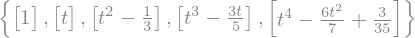

In [19]:
# Definir la variable y los límites de integración
t = symbols('t')
a, b = -1, 1

# Definir las funciones base como vectores
base = [Matrix([1]), Matrix([t]), Matrix([t**2]), Matrix([t**3]), Matrix([t**4])]

# Definir el producto interno
def producto(f, g):
    return integrate(f[0]*g[0], (t, a, b))

# Realizar Gram-Schmidt
ortogonalizados = []
for v in base:
    u = v
    for o in ortogonalizados:
        u -= (producto(v, o) / producto(o, o)) * o
    ortogonalizados.append(u)
# Mostar el resultado   
FiniteSet(*ortogonalizados)

Verifiquemos si son ortogonales:

In [20]:
e1=ortogonalizados[0]
e2=ortogonalizados[1]
e3=ortogonalizados[2]
e4=ortogonalizados[3]
e5=ortogonalizados[4]

In [21]:
vectores = [e1, e2, e3, e4, e5]
ortogonales = True
for i, vi in enumerate(vectores):
    for j, vj in enumerate(vectores):
        if j > i:  # Comparamos solo una vez para j > i
            resultado = producto(vi, vj)
            print(f"Producto interno de e{i+1} y e{j+1}: {resultado}")
            if resultado != 0:
                ortogonales = False

# Mostrar el resultado
if ortogonales:
    print("El conjunto de vectores es ortogonal.")
else:
    print("El conjunto de vectores NO es ortogonal.")

Producto interno de e1 y e2: 0
Producto interno de e1 y e3: 0
Producto interno de e1 y e4: 0
Producto interno de e1 y e5: 0
Producto interno de e2 y e3: 0
Producto interno de e2 y e4: 0
Producto interno de e2 y e5: 0
Producto interno de e3 y e4: 0
Producto interno de e3 y e5: 0
Producto interno de e4 y e5: 0
El conjunto de vectores es ortogonal.
